## Importing requried libaray

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
health = pd.read_csv("C:/Users/Dell/Downloads/insurance.csv")
health

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
## checking shape of data set
health.shape

(1338, 7)

In [4]:
## checking columns
health.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
## checking datatypes
health.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
## checking info of dataset
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
## checking  Null values
health.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
## checking duplicates
health.duplicated().sum()

1

In [9]:
## dropping duplicates
health = health.drop_duplicates()
health

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
## after dropping duplicates checking shape
health.shape

(1337, 7)

## univarant Analysis

## univarant Analysis of numerical columns

In [11]:
def univarant_num(i):
    if i.dtypes != object:
        i.plot(kind = "box")
        plt.title("boxplot")
        plt.show()
        i.plot(kind = "kde")
        plt.title("kde")
        plt.show()
        print("univariant Non-vizualition analysis ")
        print("max = ",i.max())
        print("min = ",i.min())
        print("mean = ",i.mean())
        print("median = ",i.median())
        print("standard deviation = ",i.std())

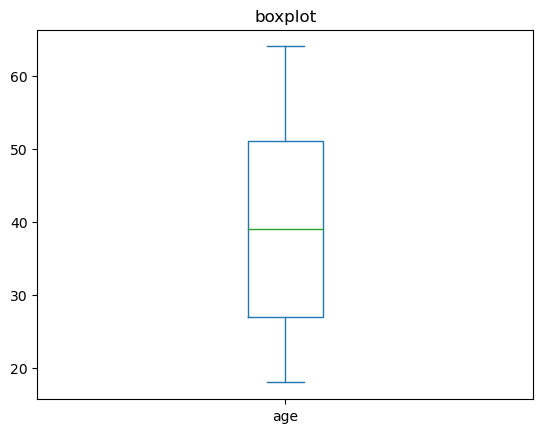

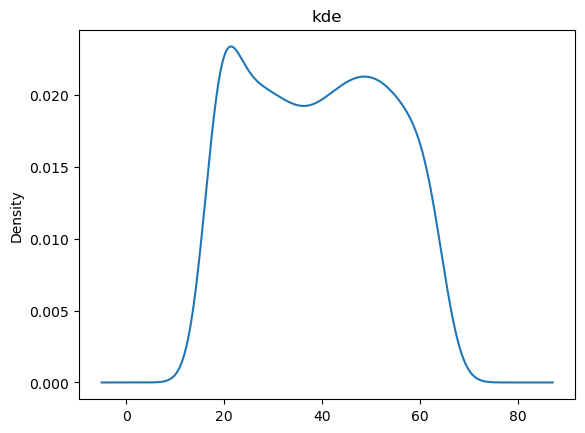

univariant Non-vizualition analysis 
max =  64
min =  18
mean =  39.222139117427076
median =  39.0
standard deviation =  14.044332734156422


In [12]:
univarant_num(health["age"])

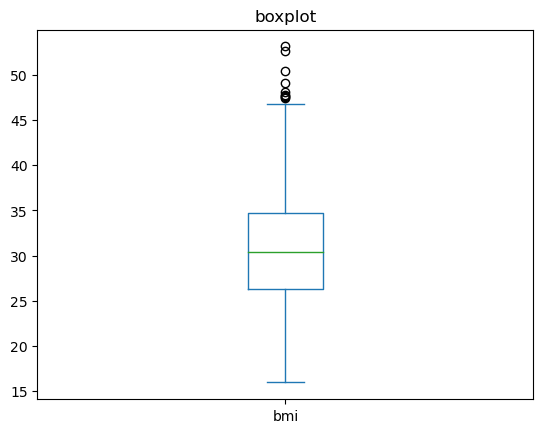

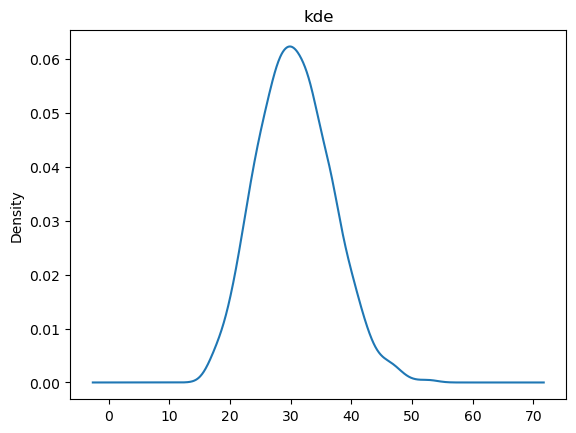

univariant Non-vizualition analysis 
max =  53.13
min =  15.96
mean =  30.66345175766642
median =  30.4
standard deviation =  6.100468409615801


In [13]:
univarant_num(health["bmi"])

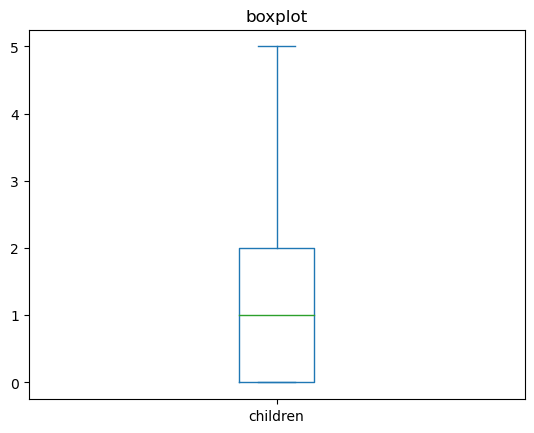

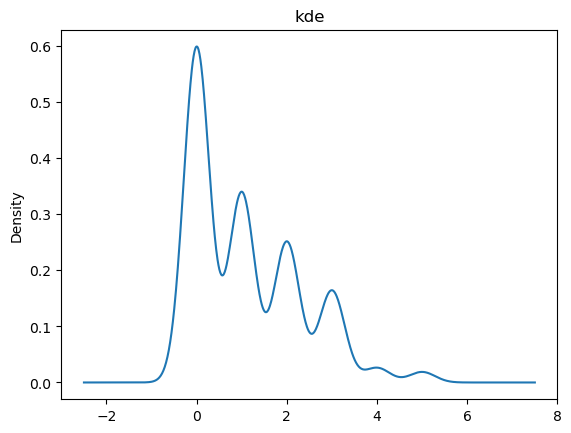

univariant Non-vizualition analysis 
max =  5
min =  0
mean =  1.0957367240089753
median =  1.0
standard deviation =  1.2055714286412185


In [14]:
univarant_num(health["children"])

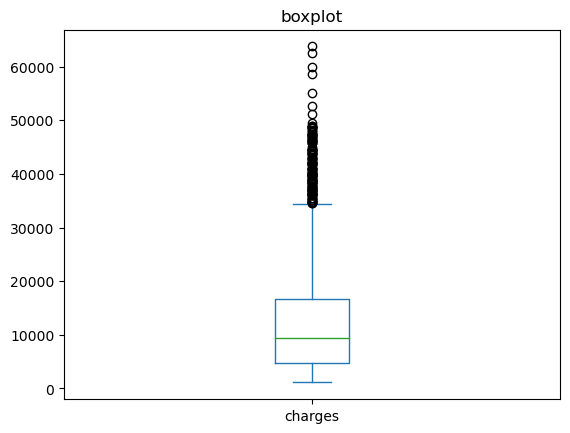

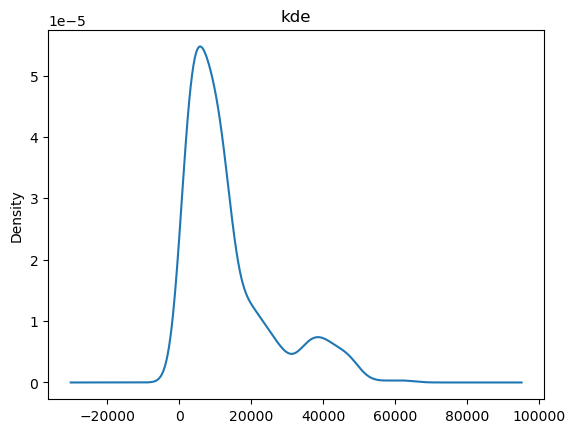

univariant Non-vizualition analysis 
max =  63770.42801
min =  1121.8739
mean =  13279.121486655948
median =  9386.1613
standard deviation =  12110.359656344179


In [15]:
univarant_num(health["charges"])

## univarint anlaysis of categorical columns 

In [17]:
def univarant_cat(i):
  if i.dtypes == "object":
    i.value_counts().plot(kind = "bar")
    plt.title("bar plot")
    plt.show()




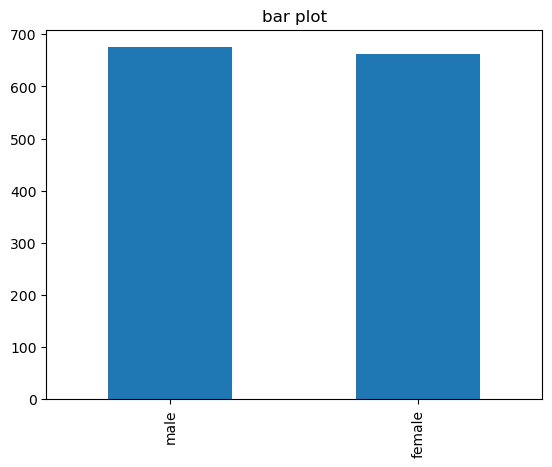

In [18]:
univarant_cat(health["sex"])

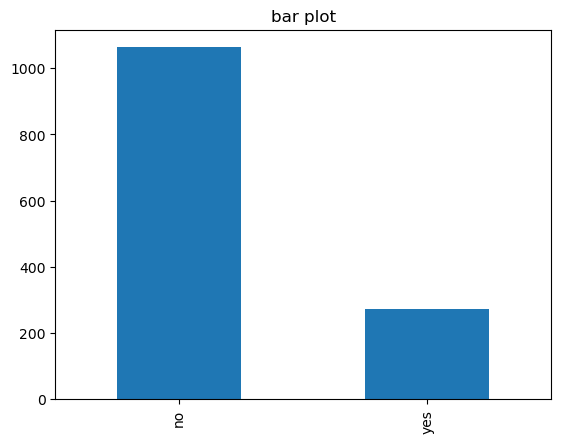

In [19]:
univarant_cat(health["smoker"])

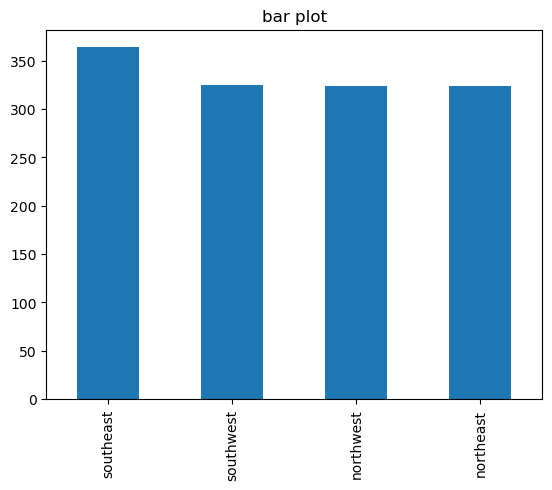

In [20]:
univarant_cat(health["region"])

## Treatement of outliers in bmi column using IQR 

In [21]:

q1 = health["bmi"].quantile(0.25)
q3 = health["bmi"].quantile(0.75)
Iqr = q3-q1
bmi_lower =q1-1.5*Iqr
bmi_upper = q3+1.5*Iqr
print("q1 = ",q1)
print("q3 =",q3)
print("Iqr =",Iqr)
print("bmi_lower = ",bmi_lower)
print("bmi_upper = ",bmi_upper)

q1 =  26.29
q3 = 34.7
Iqr = 8.410000000000004
bmi_lower =  13.674999999999994
bmi_upper =  47.31500000000001


In [22]:
#cleaned data
clean_health = health[( health["bmi"]< bmi_upper)]
clean_health

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## After Treatement of outliers in bmi column

In [23]:
def univarant_num(i):
    if i.dtypes != object:
        i.plot(kind = "box")
        plt.title("boxplot")
        plt.show()
        i.plot(kind = "kde")
        plt.title("kde")
        plt.show()

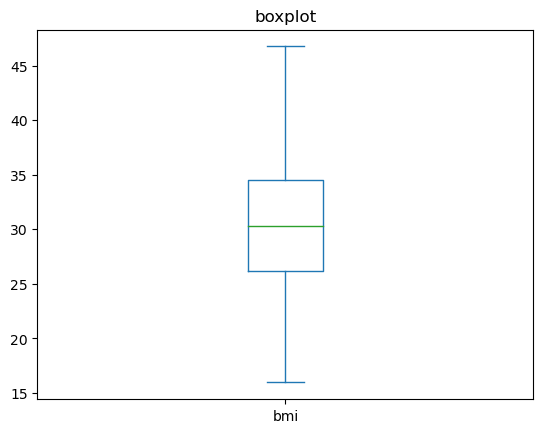

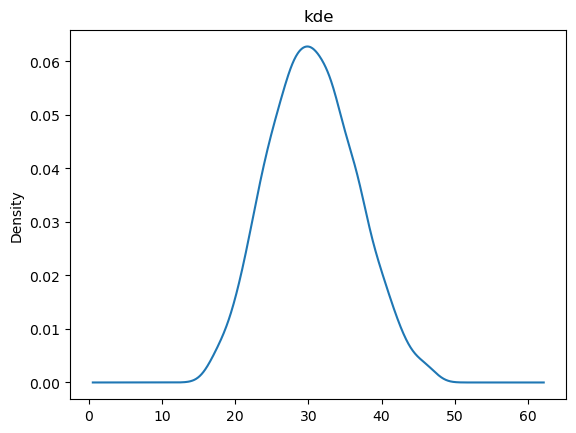

In [24]:
univarant_num(clean_health["bmi"])

## Bivarant anlaysis

## Numerical v/s Numerical

<Axes: xlabel='bmi', ylabel='charges'>

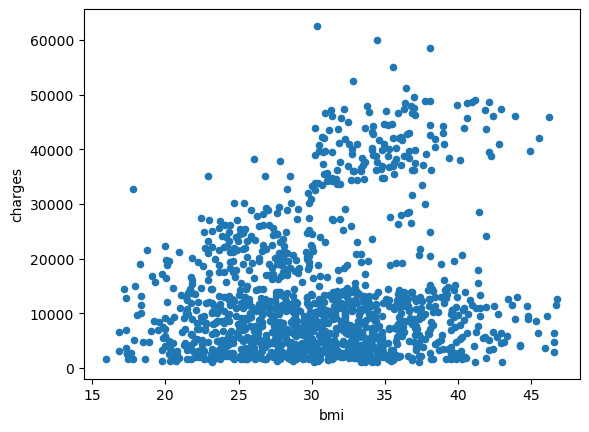

In [25]:
clean_health.plot(kind = "scatter",x = "bmi",y = "charges")

<Axes: xlabel='age', ylabel='charges'>

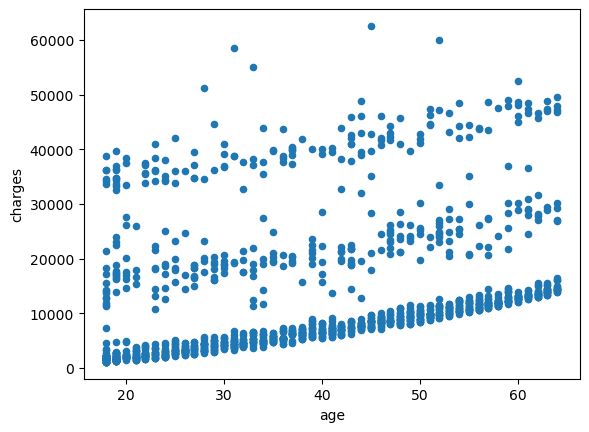

In [26]:
clean_health.plot(x = "age",y ="charges",kind = "scatter")

<Axes: xlabel='children', ylabel='charges'>

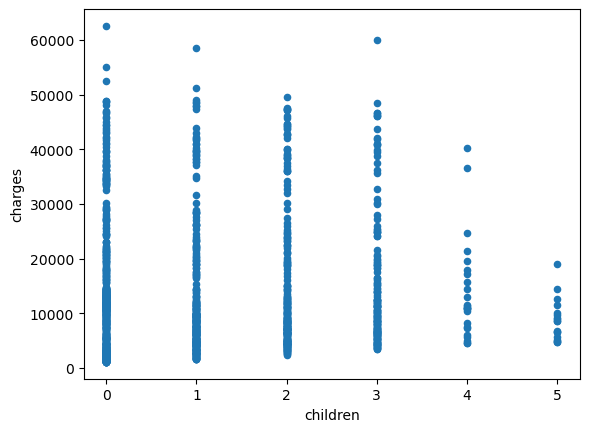

In [27]:
clean_health.plot(x='children',y = 'charges',kind = "scatter")

## categorical v/s Numerical

<Axes: title={'center': 'charges'}, xlabel='sex'>

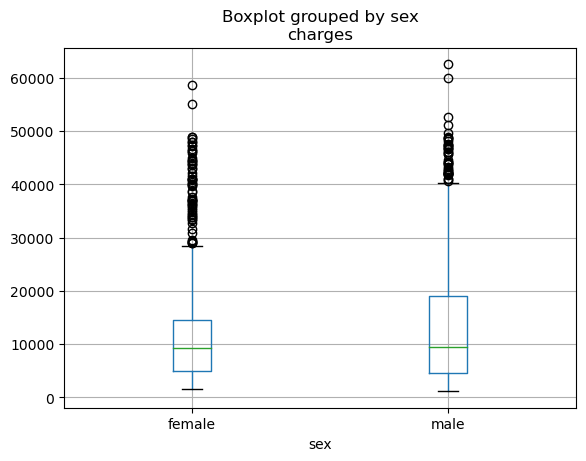

In [29]:
clean_health.boxplot(by= "sex",column = "charges")

<Axes: title={'center': 'charges'}, xlabel='region'>

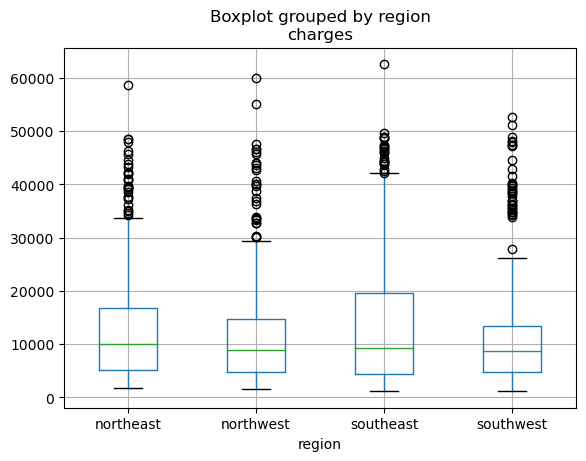

In [30]:
clean_health.boxplot(by= "region",column = "charges")

<Axes: title={'center': 'charges'}, xlabel='smoker'>

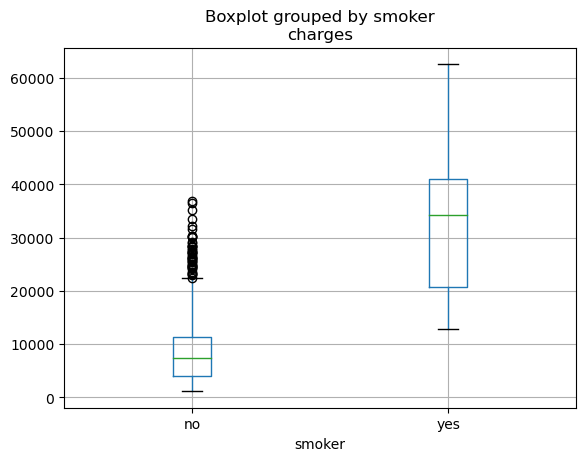

In [31]:
clean_health.boxplot(by= "smoker",column = "charges")

## Data Preparation and Model Building

In [ ]:
steps involved in building a Machine Learning model
1. Identfiying input variable and target variable
2. split data into train and test
3. Data preprocessing on X_ train
4. Building the model
5 .Data preprocessing on X_ test
6. prediction on test data
7.Evaluation of model

In [32]:
## Identifiying  inputvariable(X)  and target variable(y)
y = clean_health["charges"]
X  = clean_health[['age', "sex", "bmi", 'children', 'smoker', 'region']]

In [33]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [34]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [35]:
## spliting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.75 ,random_state = 50)
print(X_train.shape ,y_train.shape)
print(X_test.shape ,y_test.shape)

(996, 6) (996,)
(332, 6) (332,)


In [36]:
X_train.head()

,age,sex,bmi,children,smoker,region
1256,51,female,36.385,3,no,northwest
381,55,male,30.685,0,yes,northeast
81,45,female,38.285,0,no,northeast
112,37,male,30.800,0,no,southwest
807,19,female,36.575,0,no,northwest


## sepearating numerical and categorical columns

In [37]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [38]:
X_train_num = X_train.select_dtypes(include = ["int64","float64"])

In [39]:
X_train_num.head()

,age,bmi,children
1256,51,36.385,3
381,55,30.685,0
81,45,38.285,0
112,37,30.800,0
807,19,36.575,0


In [40]:
X_train_cat = X_train.select_dtypes(include = "object")

In [41]:
X_train_cat.head()

,sex,smoker,region
1256,female,no,northwest
381,male,yes,northeast
81,female,no,northeast
112,male,no,southwest
807,female,no,northwest


## rescaling the numerical column

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescale   = pd.DataFrame(scaler.fit_transform(X_train_num),
        columns = X_train_num.columns,
        index  = X_train_num.index)
X_train_num_rescale.head()

,age,bmi,children
1256,0.833688,0.964106,1.62129
381,1.116820,0.004060,-0.90711
81,0.408991,1.284121,-0.90711
112,-0.157272,0.023430,-0.90711
807,-1.431363,0.996107,-0.90711


In [43]:
print("number of numerical Features :",scaler.n_features_in_)
print("Mean of numerical Features",scaler.mean_)
print("standard deviation of numerical features",np.sqrt(scaler.var_))

number of numerical Features : 3
Mean of numerical Features [39.22188755 30.66089357  1.07630522]
standard deviation of numerical features [14.12771504  5.93721978  1.18652102]


## Applying one hot encoding on categorical column

In [44]:
X_train_cat.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [45]:
X_train_cat["sex"].value_counts(normalize = True)

male      0.503012
female    0.496988
Name: sex, dtype: float64

In [46]:
X_train_cat["smoker"].value_counts(normalize = True)

no     0.806225
yes    0.193775
Name: smoker, dtype: float64

In [47]:
X_train_cat["region"].value_counts(normalize = True)

southeast    0.266064
northwest    0.256024
southwest    0.247992
northeast    0.229920
Name: region, dtype: float64

In [65]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop = "first" ,sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                               columns = encoder.get_feature_names_out(X_train_cat.columns),
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1256,0.0,0.0,1.0,0.0,0.0
381,1.0,1.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0
112,1.0,0.0,0.0,0.0,1.0
807,0.0,0.0,1.0,0.0,0.0


## Concat the categorical columns and numerical columns of train data

In [49]:
X_train_transformed = pd.concat([X_train_num_rescale,X_train_cat_ohe],axis = 1)

In [50]:
X_train_transformed

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1256,0.833688,0.964106,1.62129,0.0,0.0,1.0,0.0,0.0
381,1.116820,0.004060,-0.90711,1.0,1.0,0.0,0.0,0.0
81,0.408991,1.284121,-0.90711,0.0,0.0,0.0,0.0,0.0
112,-0.157272,0.023430,-0.90711,1.0,0.0,0.0,0.0,1.0
807,-1.431363,0.996107,-0.90711,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
230,0.196643,0.932104,-0.06431,0.0,0.0,1.0,0.0,0.0
70,-0.865100,-0.995566,-0.90711,0.0,1.0,0.0,1.0,0.0
133,-1.431363,-0.859981,-0.90711,1.0,0.0,1.0,0.0,0.0
1323,0.196643,1.635295,0.77849,0.0,1.0,0.0,1.0,0.0


## Data  Preparation on  Test Data

In [51]:
X_test.head()

,age,sex,bmi,children,smoker,region
1178,23,female,34.865,0,no,northeast
32,19,female,28.600,5,no,southwest
1049,49,male,30.900,0,yes,southwest
554,25,female,41.325,0,no,northeast
487,19,male,28.700,0,no,southwest


In [52]:
X_test.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [53]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,sex,smoker,region
1178,female,no,northeast
32,female,no,southwest
1049,male,yes,southwest
554,female,no,northeast
487,male,no,southwest


In [54]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,age,bmi,children
1178,23,34.865,0
32,19,28.600,5
1049,49,30.900,0
554,25,41.325,0
487,19,28.700,0


In [55]:
X_test_num_rescale = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                   index = X_test_num.index)

X_test_num_rescale.head()

,age,bmi,children
1178,-1.148232,0.708093,-0.90711
32,-1.431363,-0.347114,3.30689
1049,0.692123,0.040272,-0.90711
554,-1.006666,1.796145,-0.90711
487,-1.431363,-0.330271,-0.90711


In [67]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                               columns = encoder.get_feature_names_out(X_test_cat.columns),
                               index = X_test_cat.index)
X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1178,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,1.0
1049,1.0,1.0,0.0,0.0,1.0
554,0.0,0.0,0.0,0.0,0.0
487,1.0,0.0,0.0,0.0,1.0


## Concat the categorical columns and numerical columns of test data

In [74]:
X_test_transformed = pd.concat([X_test_num_rescale ,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1178,-1.148232,0.708093,-0.90711,0.0,0.0,0.0,0.0,0.0
32,-1.431363,-0.347114,3.30689,0.0,0.0,0.0,0.0,1.0
1049,0.692123,0.040272,-0.90711,1.0,1.0,0.0,0.0,1.0
554,-1.006666,1.796145,-0.90711,0.0,0.0,0.0,0.0,0.0
487,-1.431363,-0.330271,-0.90711,1.0,0.0,0.0,0.0,1.0


## Predection & evaulation of model 

## LinearRegression

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed ,y_train)

LinearRegression()

In [75]:
 y_test_pred = regressor.predict(X_test_transformed)

In [84]:
algo_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

algo_df.head()

,Actual,Predicted
1178,2899.48935,2605.624900
32,4687.79700,9488.204068
1049,39727.61400,28849.907518
554,17878.90068,2574.463110
487,1253.93600,6065.729266


<Axes: xlabel='charges', ylabel='Count'>

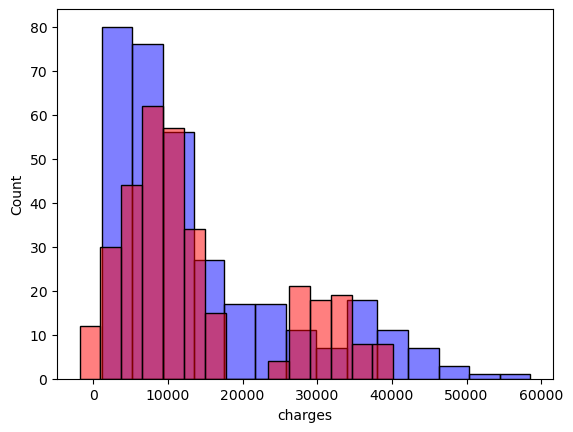

In [79]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [81]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  4547.022160878379


##  KNeighborsRegressor

In [82]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed ,y_train)

KNeighborsRegressor()

In [83]:
 y_test_pred = regressor.predict(X_test_transformed)

In [85]:
algo_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
algo_df.head()

,Actual,Predicted
1178,2899.48935,2605.624900
32,4687.79700,9488.204068
1049,39727.61400,28849.907518
554,17878.90068,2574.463110
487,1253.93600,6065.729266


<Axes: xlabel='charges', ylabel='Count'>

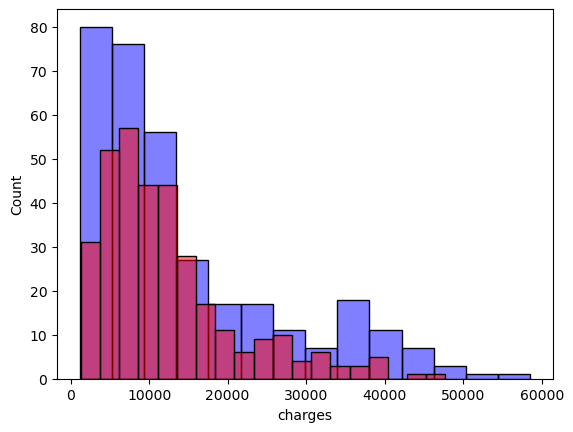

In [86]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [87]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  4403.172095028915


## support vector machines

In [89]:
from sklearn.svm import  SVR
regressor = SVR()
regressor.fit(X_train_transformed ,y_train)

SVR()

In [90]:
 y_test_pred = regressor.predict(X_test_transformed)

In [91]:
algo_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
algo_df.head()

,Actual,Predicted
1178,2899.48935,9103.370995
32,4687.79700,9181.805634
1049,39727.61400,9230.866005
554,17878.90068,9142.198310
487,1253.93600,9100.831636


<Axes: xlabel='charges', ylabel='Count'>

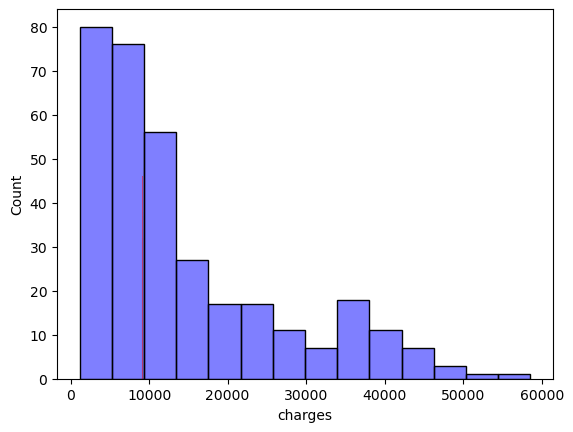

In [92]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [93]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  8923.534121763943


## DecisionTreeRegressor

In [94]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [95]:
y_test_pred = regressor.predict(X_test_transformed)

In [96]:
algo_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
algo_df.head()

,Actual,Predicted
1178,2899.48935,2396.09590
32,4687.79700,4830.63000
1049,39727.61400,41097.16175
554,17878.90068,3201.24515
487,1253.93600,1252.40700


<Axes: xlabel='charges', ylabel='Count'>

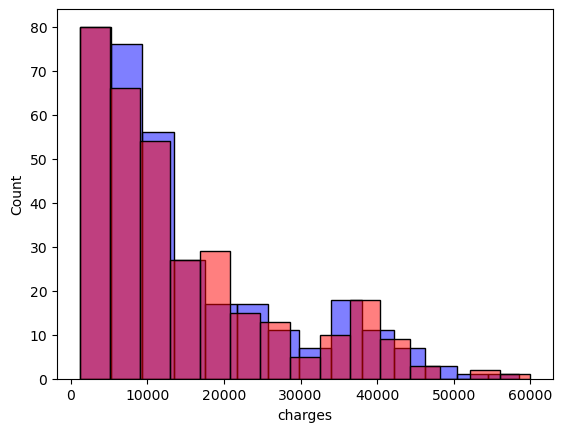

In [97]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [98]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  3869.7871843674698


## RandomForestRegressor

In [99]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)


RandomForestRegressor()

In [100]:
y_test_pred = regressor.predict(X_test_transformed)

In [101]:
algo_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
algo_df.head()

,Actual,Predicted
1178,2899.48935,4147.371867
32,4687.79700,11234.109910
1049,39727.61400,42075.564352
554,17878.90068,3095.694503
487,1253.93600,2057.337476


<Axes: xlabel='charges', ylabel='Count'>

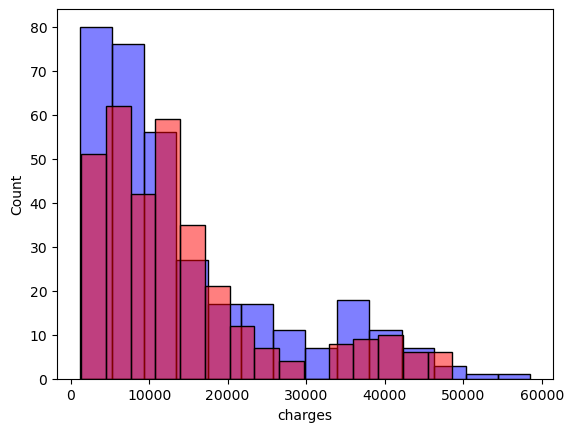

In [102]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [103]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  3099.6748230412795


### conclusion

Random forest algorthim has best prdection compare to all other algorthim.Beacuse of all other algorthims has more mean absolute error more compare to random forest algorthim.